In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import plotly.express as px
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE #smote
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
from scipy import stats
import numpy as np
import plotly.express as px
from scipy.stats import norm
from scipy.stats import zscore #outlier
from sklearn.impute import KNNImputer #knn imputer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from yellowbrick.model_selection import LearningCurve


#### Imported the data file

In [24]:
df = pd.read_csv("strokes.csv")

In [25]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,F,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,1108.90,176.0,NaN,0
3,56543,M,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,F,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [27]:
df.shape

(43400, 12)

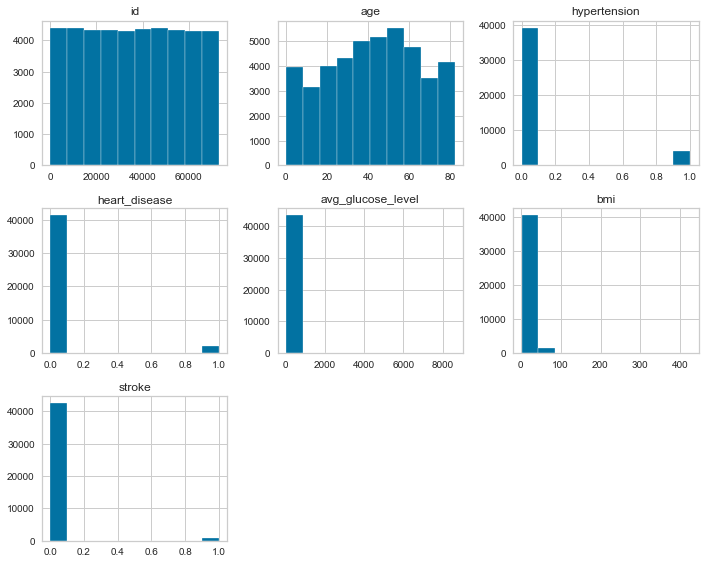

In [28]:
fig=df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


#### Drop the duplicate values

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(43400, 12)

In [32]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,False,False,False,False,False,False,False,False,False,False,False,False
43396,False,False,False,False,False,False,False,False,False,False,False,False
43397,False,False,False,False,False,False,False,False,False,False,False,False
43398,False,False,False,False,False,False,False,False,False,False,False,False


#### Number of NULL values in each column

In [33]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

# Inconsistent Data

In [34]:
print(df.nunique())

id                   43400
gender                   5
age                    104
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    12561
bmi                    578
smoking_status           3
stroke                   2
dtype: int64


In [35]:
df.gender.unique()

array(['F', 'Male', 'Female', 'M', 'Other'], dtype=object)

In [36]:
df['gender'].replace('M','Male',inplace=True)

In [37]:
df['gender'].replace('F','Female',inplace=True)

In [38]:
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [39]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Female,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,1108.90,176.0,NaN,0
3,56543,Male,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Female,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


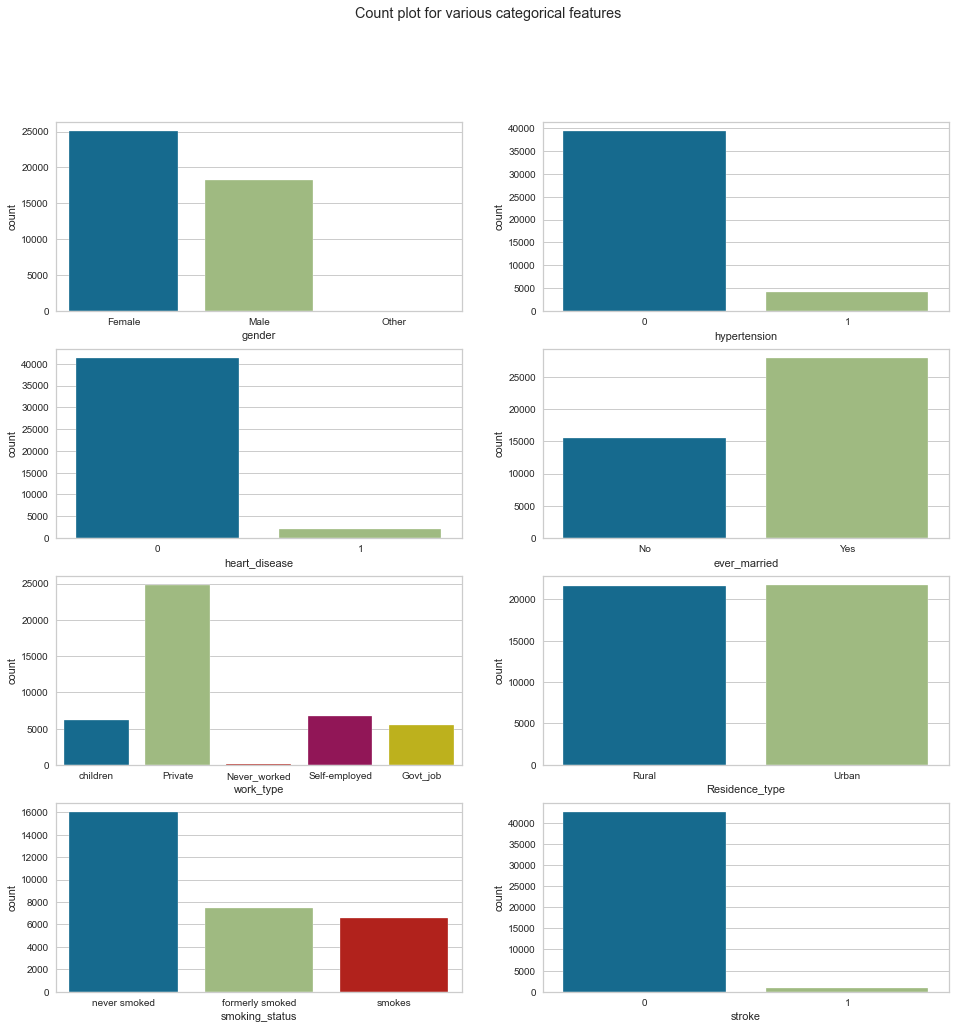

In [40]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

plt.show()

# Missing Data

<AxesSubplot:>

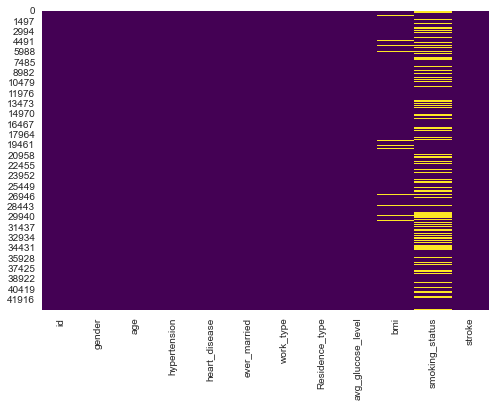

In [41]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [42]:
fig = px.pie(df, names='stroke', title='Stroke distribution')
fig.show()

In [43]:
counts0 = Counter(df[df['stroke']==0]['Residence_type'])
counts1 = Counter(df[df['stroke']==1]['Residence_type'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Residence Type','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Residence",
    font=dict(size=18)
)

fig.show()

In [44]:
counts0 = Counter(df[df['gender']=='Male']['stroke'])
counts1 = Counter(df[df['gender']=='Female']['stroke'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Male",title='Male'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Female",title='Female'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Gender','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Stroke",
    font=dict(size=18)
)

fig.show()

In [45]:
counts0 = Counter(df[df['ever_married']=='No']['stroke'])
counts1 = Counter(df[df['ever_married']=='Yes']['stroke'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Unmarried",title='Unmarried'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Married",title='Married'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Marital Status','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Stroke",
    font=dict(size=18)
)

fig.show()

In [46]:
counts0 = Counter(df[df['ever_married']=='No']['stroke'])
counts1 = Counter(df[df['ever_married']=='Yes']['stroke'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Unmarried",title='Unmarried'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Married",title='Married'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Marital Status','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Stroke",
    font=dict(size=18)
)

fig.show()

In [47]:

counts0 = Counter(df[df['stroke']==0]['work_type'])
counts1 = Counter(df[df['stroke']==1]['work_type'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Worktype','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Worktype",
    font=dict(size=18)
)

fig.show()

In [48]:
counts0 = Counter(df[df['stroke']==0]['hypertension'])
counts1 = Counter(df[df['stroke']==1]['hypertension'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=['No','Yes'],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=['No','Yes'],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Hypertension','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Hypertension",
    font=dict(size=18)
)

fig.show()

In [49]:
counts0 = Counter(df[df['stroke']==0]['heart_disease'])
counts1 = Counter(df[df['stroke']==1]['heart_disease'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=['No','Yes'],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=['No','Yes'],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Heart Disease','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Heart Disease",
    font=dict(size=18)
)

fig.show()

## filling missing values in smoking_status column with constant

In [50]:
df.smoking_status.fillna('Unknown',inplace=True)

In [51]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Female,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,1108.90,176.0,Unknown,0
3,56543,Male,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Female,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [52]:
df.shape

(43400, 12)

<AxesSubplot:>

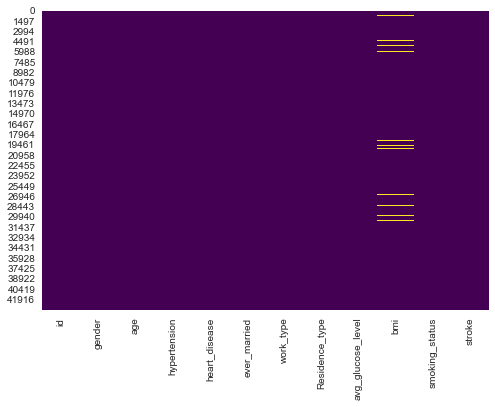

In [53]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [54]:
categorical_column = ['gender','ever_married','work_type', 'Residence_type', 'smoking_status']
for i in categorical_column:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

# Detecting Outlier

### Filling missing values for avg_glucose_level with standard deviation

In [55]:
df['avg_glucose_level'].fillna(value=df['avg_glucose_level'].std(),inplace=True)

In [56]:
df.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1462
smoking_status          0
stroke                  0
dtype: int64

## Filling missing values for bmi column using KNN computer

### KNN imputer

In [57]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [58]:
df = df.drop(['id'],axis=1)

In [59]:
# fit on the dataset
imputer.fit(df)

KNNImputer()

In [60]:
# transform the dataset
Xtrans = imputer.transform(df)

In [61]:
print(Xtrans)

[[  0.    3.    0.  ...  18.    0.    0. ]
 [  1.   58.    1.  ...  39.2   2.    0. ]
 [  0.    8.    0.  ... 176.    0.    0. ]
 ...
 [  0.   82.    1.  ...  28.9   1.    0. ]
 [  1.   40.    0.  ...  33.2   2.    0. ]
 [  0.   82.    0.  ...  20.6   2.    0. ]]


In [62]:
df = pd.DataFrame(Xtrans)

In [63]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [64]:
df.rename(columns={0:"gender",1:"age", 2:"hypertension", 3:"heart_disease", 4:"ever_married",
       5:"work_type", 6: "Residence_type", 7:"avg_glucose_level", 8:"bmi", 9:"smoking_status",
       10:"stroke"},inplace=True)

In [65]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,95.12,18.0,0.0,0.0
1,1.0,58.0,1.0,0.0,1.0,2.0,1.0,87.96,39.2,2.0,0.0
2,0.0,8.0,0.0,0.0,0.0,2.0,1.0,1108.90,176.0,0.0,0.0
3,1.0,70.0,0.0,0.0,1.0,2.0,0.0,69.04,35.9,1.0,0.0
4,0.0,14.0,0.0,0.0,0.0,1.0,0.0,161.28,19.1,0.0,0.0


In [66]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

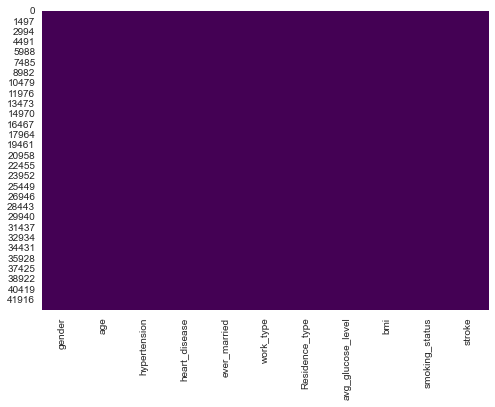

In [67]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

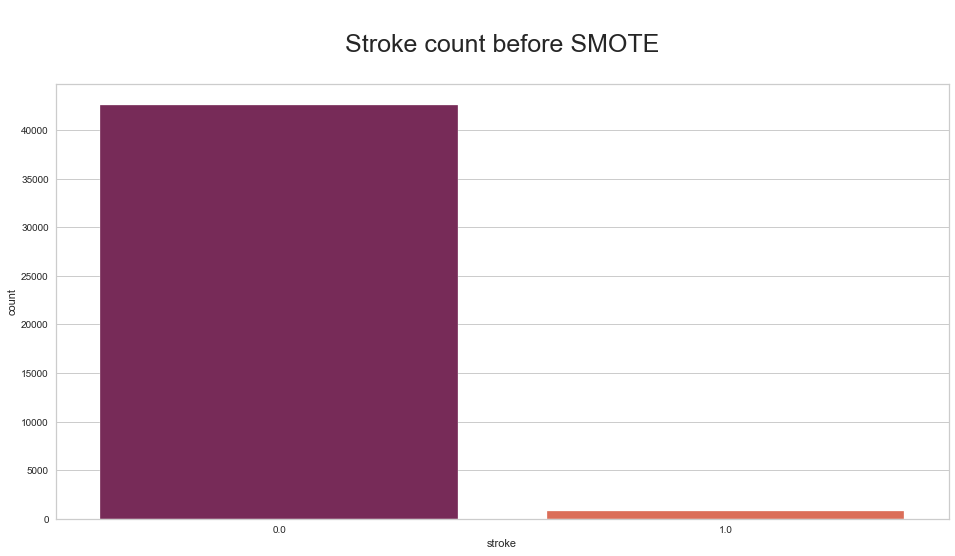

In [68]:
# same as work type bar chart will do
plt.figure(figsize=(16,8))
sns.countplot(data=df, x="stroke", palette='rocket')
plt.title("\nStroke count before SMOTE\n", fontsize=25)
plt.show()

# Removing Outliers using quantile

In [69]:
cols = ['avg_glucose_level', 'bmi']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [70]:
df.shape

(37705, 11)

### Scatter plot for avg_glucose_level vs bmi with a Stroke hue

C:\Users\deep\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



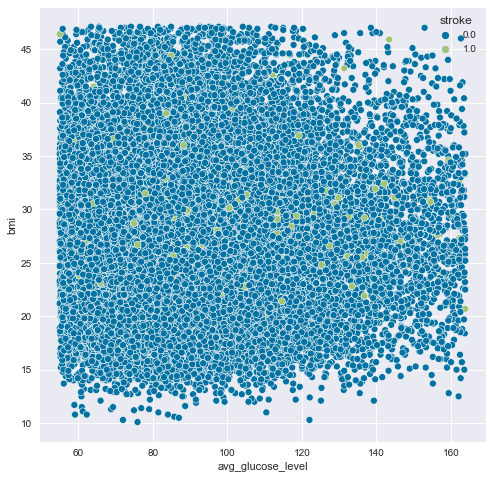

In [71]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = df, x = 'avg_glucose_level', y = 'bmi', hue='stroke')
plt.show()

### Scatter plot for age vs avg_glucose_level with a Stroke hue

C:\Users\deep\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



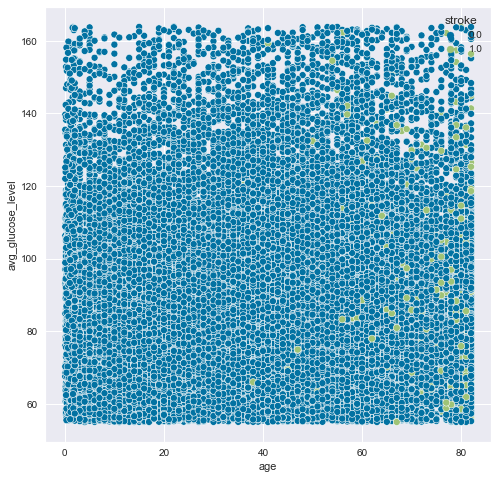

In [72]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = df, x = 'age', y = 'avg_glucose_level', hue='stroke')
plt.show()

### Scatter plot for age vs bmi with a Stroke hue 


C:\Users\deep\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



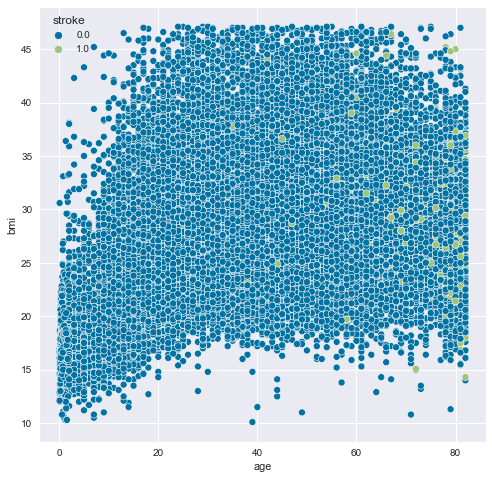

In [73]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue='stroke')
plt.show()

### Violin plot for continuous features

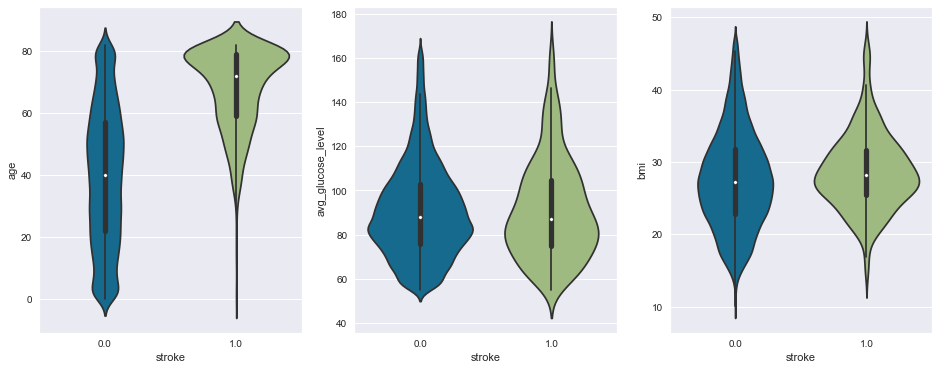

In [74]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.violinplot(x = 'stroke', y = 'age', data = df)
plt.subplot(1,3,2)
sns.violinplot(x = 'stroke', y = 'avg_glucose_level', data = df)
plt.subplot(1,3,3)
sns.violinplot(x = 'stroke', y = 'bmi', data = df)
plt.show()

C:\Users\deep\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

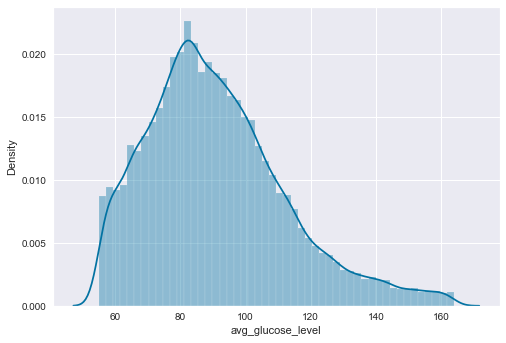

In [75]:
sns.distplot(df['avg_glucose_level'])

C:\Users\deep\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



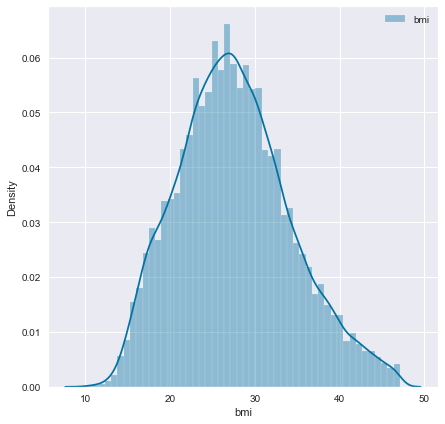

In [76]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.bmi, label="bmi", kde= True)
plt.legend()

# Data Normalization

In [77]:
df1 = df

In [78]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,95.12,18.0,0.0,0.0
1,1.0,58.0,1.0,0.0,1.0,2.0,1.0,87.96,39.2,2.0,0.0
3,1.0,70.0,0.0,0.0,1.0,2.0,0.0,69.04,35.9,1.0,0.0
4,0.0,14.0,0.0,0.0,0.0,1.0,0.0,161.28,19.1,0.0,0.0
6,0.0,52.0,0.0,0.0,1.0,2.0,1.0,77.59,17.7,1.0,0.0


In [79]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,95.12,18.0,0.0,0.0
1,1.0,58.0,1.0,0.0,1.0,2.0,1.0,87.96,39.2,2.0,0.0
3,1.0,70.0,0.0,0.0,1.0,2.0,0.0,69.04,35.9,1.0,0.0
4,0.0,14.0,0.0,0.0,0.0,1.0,0.0,161.28,19.1,0.0,0.0
6,0.0,52.0,0.0,0.0,1.0,2.0,1.0,77.59,17.7,1.0,0.0


In [80]:
df2 = df1[['bmi','avg_glucose_level']]

In [81]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,95.12,18.0,0.0,0.0
1,1.0,58.0,1.0,0.0,1.0,2.0,1.0,87.96,39.2,2.0,0.0
3,1.0,70.0,0.0,0.0,1.0,2.0,0.0,69.04,35.9,1.0,0.0
4,0.0,14.0,0.0,0.0,0.0,1.0,0.0,161.28,19.1,0.0,0.0
6,0.0,52.0,0.0,0.0,1.0,2.0,1.0,77.59,17.7,1.0,0.0


# Data Regularization

### Data Augmentation

In [82]:
X = df.drop(['stroke'], axis=1)
y = df.stroke

In [83]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [84]:
print(X)

         gender        age  hypertension  heart_disease  ever_married  \
0      0.000000   3.000000           0.0       0.000000      0.000000   
1      1.000000  58.000000           1.0       0.000000      1.000000   
2      1.000000  70.000000           0.0       0.000000      1.000000   
3      0.000000  14.000000           0.0       0.000000      0.000000   
4      0.000000  52.000000           0.0       0.000000      1.000000   
...         ...        ...           ...            ...           ...   
74355  0.061712  21.493699           0.0       0.000000      0.061712   
74356  0.428093  78.143814           0.0       0.000000      1.000000   
74357  1.000000  54.000000           0.0       0.000000      1.000000   
74358  0.000000  78.000000           0.0       0.439312      1.000000   
74359  0.722439  78.277561           0.0       0.722439      1.000000   

       work_type  Residence_type  avg_glucose_level        bmi  smoking_status  
0       4.000000        0.000000          

In [85]:
len(X)

74360

In [86]:
len(y)

74360

In [87]:
newx = pd.DataFrame(X)

In [88]:
newx['stroke'] = y

In [89]:
newx.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,95.12,18.0,0.0,0.0
1,1.0,58.0,1.0,0.0,1.0,2.0,1.0,87.96,39.2,2.0,0.0
2,1.0,70.0,0.0,0.0,1.0,2.0,0.0,69.04,35.9,1.0,0.0
3,0.0,14.0,0.0,0.0,0.0,1.0,0.0,161.28,19.1,0.0,0.0
4,0.0,52.0,0.0,0.0,1.0,2.0,1.0,77.59,17.7,1.0,0.0


In [90]:
newx.shape

(74360, 11)

In [91]:
df.rename(columns={0:"gender",1:"age", 2:"hypertension", 3:"heart_disease", 4:"ever_married",
       5:"work_type", 6: "Residence_type", 7:"avg_glucose_level", 8:"bmi", 9:"smoking_status",
       10:"stroke"},inplace=True)

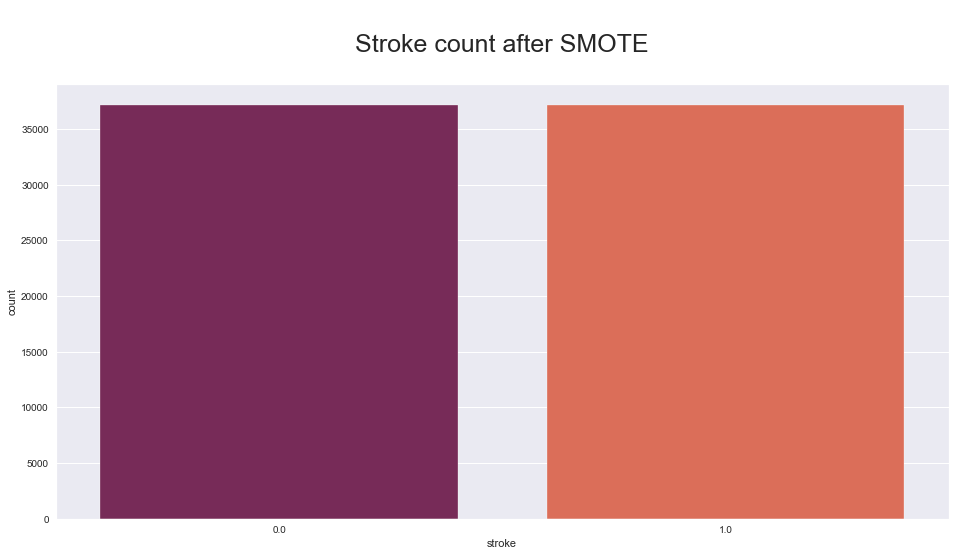

In [92]:
# same as work type bar chart will do
plt.figure(figsize=(16,8))
sns.countplot(data=newx, x="stroke", palette='rocket')
plt.title("\nStroke count after SMOTE\n", fontsize=25)
plt.show()

# Data Reduction

## PCA


In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [94]:
newx.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,95.12,18.0,0.0,0.0
1,1.0,58.0,1.0,0.0,1.0,2.0,1.0,87.96,39.2,2.0,0.0
2,1.0,70.0,0.0,0.0,1.0,2.0,0.0,69.04,35.9,1.0,0.0
3,0.0,14.0,0.0,0.0,0.0,1.0,0.0,161.28,19.1,0.0,0.0
4,0.0,52.0,0.0,0.0,1.0,2.0,1.0,77.59,17.7,1.0,0.0


In [95]:
newx.shape

(74360, 11)

In [96]:
X = newx.iloc[:,0:10]
y = newx.iloc[:,10]

In [97]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [98]:
#Data Frame before performing PCA
X.shape

(74360, 10)

In [99]:
y.shape

(74360,)

In [100]:
# Dimensional Reduction by selecting 95% of dimension using PCA
pca = PCA(0.95)
X=pca.fit_transform(X)
pca_variance = pca.explained_variance_ratio_

In [101]:
print(pca_variance)

[0.2242251  0.12888222 0.10878662 0.09976817 0.09526209 0.08513507
 0.08371505 0.07484965 0.06752062]


In [102]:
#Data Frame After PCA
X.shape

(74360, 9)

In [103]:
print(X)

[[ 4.04717432  0.6586449  -1.12202592 ... -0.37177691  0.27646164
  -0.23492698]
 [-1.9250093   0.17391061  0.24709984 ...  0.53847315  0.48140827
   0.01703594]
 [-0.89138643 -0.1305561  -0.02038693 ... -0.95734516 -0.3315298
  -0.55736032]
 ...
 [-0.39982584 -0.44148277  0.64564482 ...  0.59926425 -0.99908569
  -0.06322364]
 [-0.80723588  0.98647062 -0.31147507 ... -0.681767    0.38212576
  -1.22146363]
 [-1.76216403  1.19367641  1.15161279 ...  0.45689986  0.8414918
  -0.62388553]]


In [104]:
pca_df=pd.DataFrame(X)

In [105]:
pca_df.head()

,0,1,2,3,4,5,6,7,8
0,4.047174,0.658645,-1.122026,0.992155,-0.412265,0.146607,-0.371777,0.276462,-0.234927
1,-1.925009,0.173911,0.247100,-2.073223,0.334378,2.322341,0.538473,0.481408,0.017036
2,-0.891386,-0.130556,-0.020387,-0.178100,2.162565,0.125352,-0.957345,-0.331530,-0.557360
3,2.570430,-0.197914,1.077200,2.916142,-1.159768,0.829084,-0.639664,1.148921,2.289223
4,0.630888,-0.365396,-0.437417,-0.533757,-1.289410,-1.370764,-0.387653,-1.067940,0.793316


In [106]:
y.shape

(74360,)

In [107]:
pca_df.shape

(74360, 9)

In [108]:
pca_df['9'] = y

In [109]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,4.047174,0.658645,-1.122026,0.992155,-0.412265,0.146607,-0.371777,0.276462,-0.234927,0.0
1,-1.925009,0.173911,0.247100,-2.073223,0.334378,2.322341,0.538473,0.481408,0.017036,0.0
2,-0.891386,-0.130556,-0.020387,-0.178100,2.162565,0.125352,-0.957345,-0.331530,-0.557360,0.0
3,2.570430,-0.197914,1.077200,2.916142,-1.159768,0.829084,-0.639664,1.148921,2.289223,0.0
4,0.630888,-0.365396,-0.437417,-0.533757,-1.289410,-1.370764,-0.387653,-1.067940,0.793316,0.0


# train test split

In [110]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8,random_state=43)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=43)

In [111]:
print("number of instances in original data:", len(df))
print("number of instances after augmentation:",len(X))
print("number of instances in training data:",len(X_train))
print("number of instances in validation data:",len(X_val))
print("number of instances in test data:",len(X_test))


number of instances in original data: 37705
number of instances after augmentation: 74360
number of instances in training data: 59488
number of instances in validation data: 7436
number of instances in test data: 7436


# SVM

In [112]:
from sklearn import svm
from sklearn.svm import SVC

### kernel = RBF

In [113]:
svc_rbf_1 = SVC(kernel='rbf')
svc_rbf_1.fit(X_train,y_train)

SVC()

In [114]:
y_pred_rbf_1 = svc_rbf_1.predict(X_test)

In [115]:
print("SVM accuracy : ",accuracy_score(y_test,y_pred_rbf_1))
cm1 = confusion_matrix(y_test, y_pred_rbf_1)
print(cm1)
print(classification_report(y_test,y_pred_rbf_1))

SVM accuracy :  0.9303388918773534
[[3673  181]
 [ 337 3245]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      3854
         1.0       0.95      0.91      0.93      3582

    accuracy                           0.93      7436
   macro avg       0.93      0.93      0.93      7436
weighted avg       0.93      0.93      0.93      7436



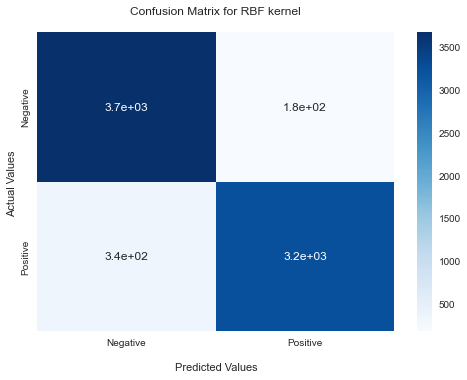

In [116]:
import seaborn as sns

ax = sns.heatmap(cm1, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for RBF kernel\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [117]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity for RBF: ', sensitivity1 )

Sensitivity for RBF:  0.9530358069538142


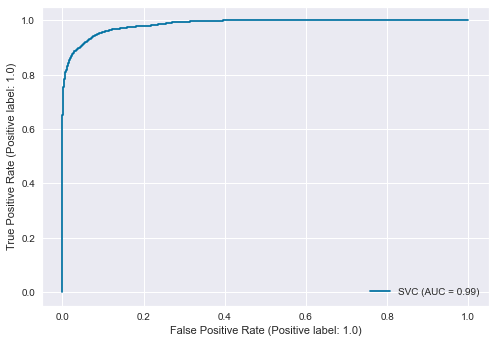

In [118]:
from sklearn.metrics import RocCurveDisplay
svc_disp_rbf = RocCurveDisplay.from_estimator(svc_rbf_1, X_test, y_test)
plt.show()

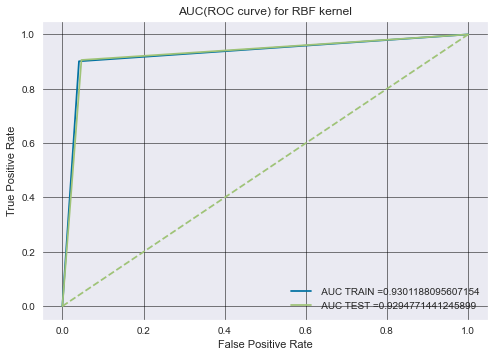

In [119]:
y_train_pred=svc_rbf_1.predict(X_train)
y_test_pred = svc_rbf_1.predict(X_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) for RBF kernel")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Random Forest


In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
y_pred = rfc.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred),'\n')
print("Classification Report: \n",classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9825174825174825 

Confusion Matrix: 
 [[3746  108]
 [  22 3560]] 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3854
         1.0       0.97      0.99      0.98      3582

    accuracy                           0.98      7436
   macro avg       0.98      0.98      0.98      7436
weighted avg       0.98      0.98      0.98      7436



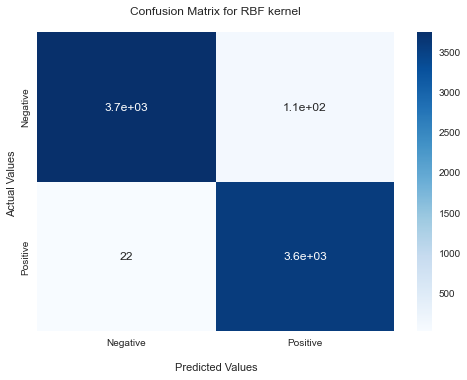

In [122]:
import seaborn as sns

ax = sns.heatmap(confusion, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for RBF kernel\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [123]:
sensitivity1 = confusion[0,0]/(confusion[0,0]+confusion[0,1])
print('Sensitivity for Random Forest: ', sensitivity1 )

Sensitivity for Random Forest:  0.9719771665801764


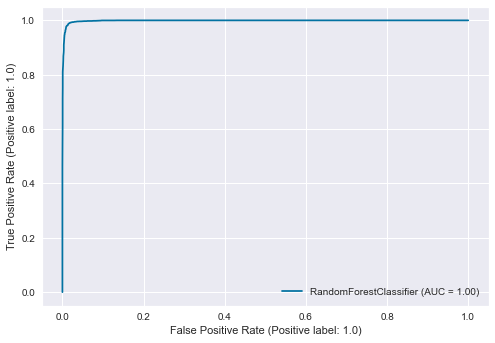

In [124]:
from sklearn.metrics import RocCurveDisplay
svc_disp_rbf = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.show()

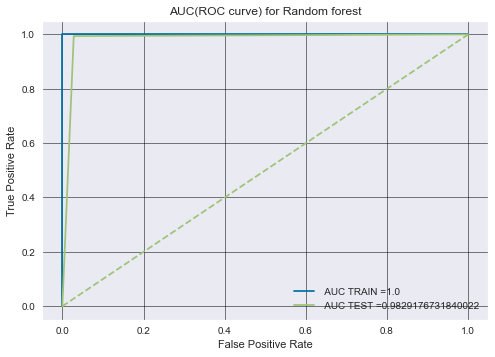

In [125]:
y_train_pred=rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) for Random forest")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [127]:
conf_dt=confusion_matrix(y_test, y_pred)
print("Decision Tree Model Accuracy:",accuracy_score(y_test,y_pred),'\n')
print("Confusion Matrix: \n",conf_dt,'\n')
print("Classification Report: \n",classification_report(y_test, y_pred))

Decision Tree Model Accuracy: 0.950242065626681 

Confusion Matrix: 
 [[3633  221]
 [ 149 3433]] 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      3854
         1.0       0.94      0.96      0.95      3582

    accuracy                           0.95      7436
   macro avg       0.95      0.95      0.95      7436
weighted avg       0.95      0.95      0.95      7436



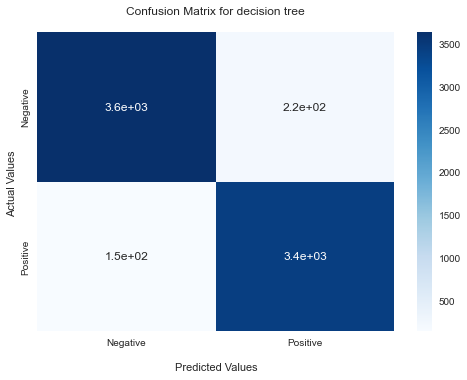

In [128]:
import seaborn as sns

ax = sns.heatmap(conf_dt, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for decision tree\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [129]:
sensitivity1 = conf_dt[0,0]/(conf_dt[0,0]+conf_dt[0,1])
print('Sensitivity for decision tree: ', sensitivity1 )

Sensitivity for decision tree:  0.9426569797612869


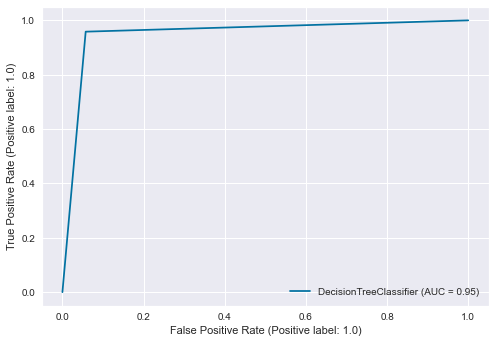

In [130]:
from sklearn.metrics import RocCurveDisplay
svc_disp_rbf = RocCurveDisplay.from_estimator(dtree, X_test, y_test)
plt.show()

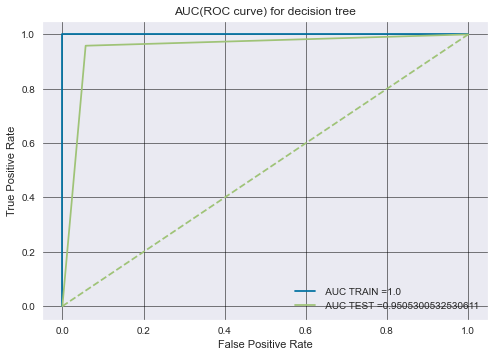

In [131]:
y_train_pred=dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) for decision tree")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# K nearest neighbor

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
classifier = KNeighborsClassifier(n_neighbors=18,p=2,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [134]:
conf_knn=confusion_matrix(y_test, y_pred)
print("Random foresrt Model Accuracy:",accuracy_score(y_test,y_pred),'\n')
print("Confusion Matrix: \n",conf_knn,'\n')
print("Classification Report: \n",classification_report(y_test, y_pred))

Random foresrt Model Accuracy: 0.9451317912856374 

Confusion Matrix: 
 [[3475  379]
 [  29 3553]] 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      3854
         1.0       0.90      0.99      0.95      3582

    accuracy                           0.95      7436
   macro avg       0.95      0.95      0.95      7436
weighted avg       0.95      0.95      0.95      7436



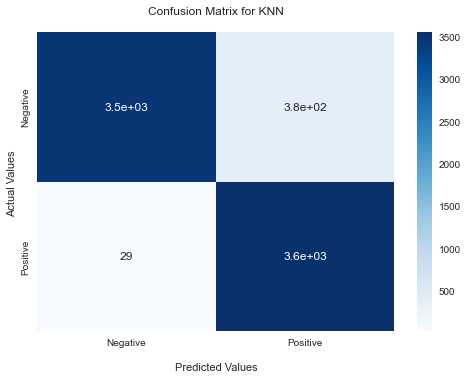

In [135]:
import seaborn as sns

ax = sns.heatmap(conf_knn, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for KNN\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [136]:
sensitivity1 = conf_knn[0,0]/(conf_knn[0,0]+conf_knn[0,1])
print('Sensitivity for knn: ', sensitivity1 )

Sensitivity for knn:  0.9016606123508044


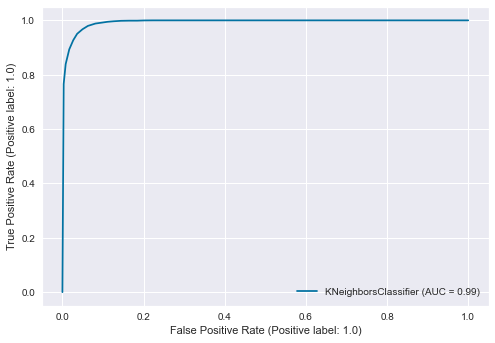

In [137]:
from sklearn.metrics import RocCurveDisplay
svc_disp_rbf = RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.show()

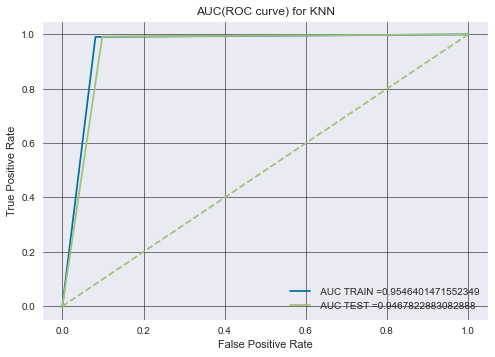

In [138]:
y_train_pred=classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) for KNN")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()